In [111]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import matplotlib.pyplot as plt

# The goal with this data set is to predict a fish's weight based
# on several other variables.

# A key point is that the species of a fish is not a continuous variable but rather a categorical one.
# Consequently, the species must be encoded as a continous variable

In [112]:
SPECIES_COL = "Species"
WEIGHT_COL = "Weight"
fish_data = pd.read_csv("Fish.csv")
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Text(0.5, 1.0, 'Weights of fish species')

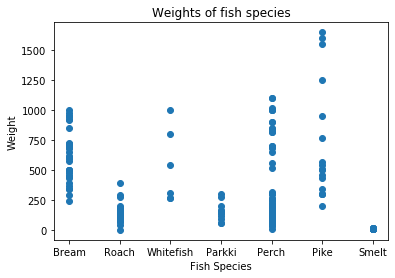

In [113]:
fig, ax = plt.subplots()
ax.scatter(fish_data["Species"], fish_data["Weight"])
ax.set_xlabel("Fish Species")
ax.set_ylabel("Weight")
ax.set_title("Weights of fish species")

In [114]:
class MeanPredictor:
    """
    A regression model that just returns the mean of the data for all predictions
    """
    def __init__(self, mean):
        self.mean = mean
    
    def predict(self, X):
        return [self.mean for i in range(X.shape[0])]
    
    def __name__(self):
        return "MeanPredictor"
    
# Store the mean weight for the baseline predictor
MEAN_WEIGHT = np.sum(fish_data[WEIGHT_COL])
mean_predictor = MeanPredictor(MEAN_WEIGHT)

In [115]:
# Encode the "Species" categorical variable as a continous random variable
fish_data = pd.get_dummies(fish_data)
fish_data

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [116]:
# Separate the data into training and test sets
X = fish_data.drop(columns=WEIGHT_COL)
y = fish_data[WEIGHT_COL]
test_size, rand_state = 0.33, 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [117]:
def run_predictors(X_train, X_test, y_train, y_test):
    predictors = [
        LinearRegression().fit(X_train, y_train),
        SVR(gamma="scale").fit(X_train, y_train),
        Ridge().fit(X_train, y_train),
    ]
    
    scores = []
    # Make predictions for the baseline model - MeanPredictor
    scores.append( ("MeanPredictor", mean_squared_error(mean_predictor.predict(X_test), y_test)) )
    
    for pred in predictors:
        pred_name = type(pred).__name__
        y_pred = pred.predict(X_test)
        score = mean_squared_error(y_pred, y_test)
        scores.append( (pred_name, score) )
    
    
    return scores

In [118]:
scores = run_predictors(X_train, X_test, y_train, y_test)
scores

[('MeanPredictor', 3962409972.3960366),
 ('LinearRegression', 11107.667607870431),
 ('SVR', 113672.82137510736),
 ('Ridge', 10645.266559211692)]

In [119]:
def plot_predictor_results(scores):
    pass